In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, SimpleRNN,GRU,Input,SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:
# Load the dataset
df = pd.read_csv('..//..//dataset//Dataset_IoV.csv')  


# Separating features and target
X = df[['Number of Lanes', 'Status of driver', 'Nature of environment', 'Velocity of vehicle', 'Distance between vehicles', 'Breaking capability']]
y = df['Collussion']
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X



In [4]:


def create_sequences(X1, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X1) - time_steps):
        sequences.append(X1[i:i + time_steps])
        labels.append(y[i + time_steps-1])  # Predict next step
    return np.array(sequences), np.array(labels)# Ensure binary labels are float32


# Create sequences
X_scaled_1, y1 = create_sequences(X_scaled, y, 3)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
# X_scaled_2 = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_1, y1, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape, y_train.shape,X_scaled.shape,y.shape,X.shape)
print(X_train[0],y_train[0])

(165417, 3, 6) (165417,) (206775, 6) (206775,) (206775, 6)
[[1.   2.   1.   0.35 0.   0.  ]
 [2.   2.   1.   0.35 1.   1.  ]
 [2.   2.   1.   0.35 0.   0.  ]] 1


# Model

In [6]:
def build_lstm():
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    
    # LSTM layer with 3 hidden layers
    model.add(SimpleRNN(units=100, activation='relu', return_sequences=True))
    model.add(LSTM(units=100,activation='relu', return_sequences=True))
    model.add(LSTM(units=100,))
    
    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['mse', 'mae'])
    
    return model


In [7]:
# Instantiate and train the model
model = build_lstm()
import time
start_time=time.time()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=(X_test, y_test)
)
end_time = time.time()

Epoch 1/50
5170/5170 ━━━━━━━━━━━━━━━━━━━━ 51s 9ms/step - loss: 0.0769 - mae: 0.0517 - mse: 0.0238 - val_loss: 1.0846e-04 - val_mae: 1.0124e-04 - val_mse: 1.0246e-05
Epoch 2/50
5170/5170 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - loss: 0.0028 - mae: 0.0015 - mse: 6.8630e-04 - val_loss: 6.9797e-05 - val_mae: 6.5684e-05 - val_mse: 6.4116e-06
Epoch 3/50
5170/5170 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0023 - mae: 9.1876e-04 - mse: 4.9816e-04 - val_loss: 2.2518e-05 - val_mae: 2.0823e-05 - val_mse: 2.6397e-06
Epoch 4/50
5170/5170 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 0.0013 - mae: 6.4922e-04 - mse: 3.0439e-04 - val_loss: 1.3575e-05 - val_mae: 1.3182e-05 - val_mse: 6.9976e-07
Epoch 5/50
5170/5170 ━━━━━━━━━━━━━━━━━━━━ 54s 10ms/step - loss: 2.8485e-04 - mae: 1.3803e-04 - mse: 6.0081e-05 - val_loss: 1.0002e-04 - val_mae: 4.3535e-05 - val_mse: 2.4337e-05
Epoch 6/50
5170/5170 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - loss: 6.4122e-04 - mae: 2.4660e-04 - mse: 1.3084e-04 - val_loss: 2.1508e-04 - val_ma

In [8]:
# Calculate total training time
total_training_time = end_time - start_time  # in seconds
epochs = 50 # e.g., 50
steps_per_epoch = 5170# e.g., 2000

# Total steps
total_steps = epochs * steps_per_epoch

# Calculate time per step
time_per_step = total_training_time / total_steps  # in seconds
time_per_step_ms = time_per_step * 1000  # Convert to milliseconds
#micro seconds
time_per_step_us = time_per_step_ms * 1000

# Calculate time per epoch
time_per_epoch = total_training_time / epochs

# Display results
print(f"Total Steps: {total_steps}")
print(f"Time per Step: {time_per_step:.6f} sec ({time_per_step_ms:.2f} ms)")
print(f"Time per Step: {time_per_step_us:.2f} µs")
print(f"Time per Epoch: {time_per_epoch:.2f} sec")


Total Steps: 258500
Time per Step: 0.010050 sec (10.05 ms)
Time per Step: 10050.04 µs
Time per Epoch: 51.96 sec


In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for y_pred (MSE): {mse:.16f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.16f}')


#ACCUARCY
y_pred = (y_pred > 0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')


1293/1293 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Mean Squared Error for y_pred (MSE): 0.0000206251661439
Root Mean Squared Error (RMSE): 0.0045414938229478
Accuracy: 99.99758191270705


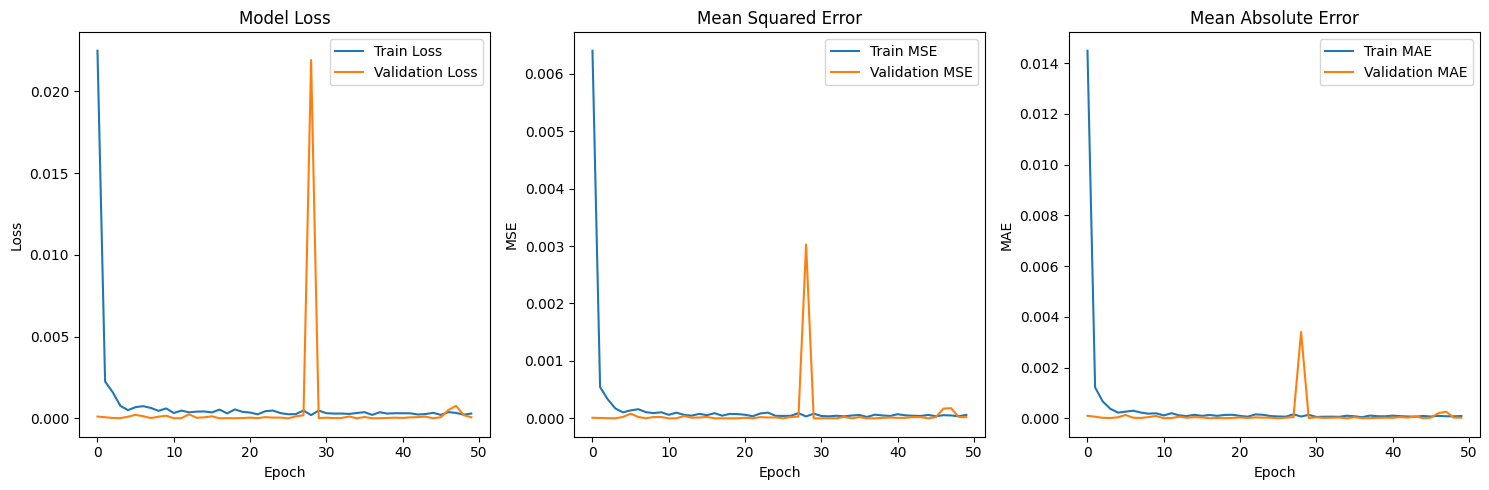

In [11]:
import matplotlib.pyplot as plt

# Visualizing the loss, MSE, and MAE
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MSE plot
plt.subplot(1, 3, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MAE plot
plt.subplot(1, 3, 3)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
